# Modelling - First Run

In [115]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import string
import nltk

import gensim
from gensim.test.utils import datapath
from gensim import corpora, models, similarities
from gensim.models import CoherenceModel, LdaModel, LdaMulticore
import pickle

from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer

import pyLDAvis
import pyLDAvis.gensim as p_gensim

import os
import pathlib
%matplotlib inline

In [31]:
final_df = pd.read_csv('./dataframes/final_df.csv',index_col=0)

In [32]:
final_df = final_df[['review','clean_reviews','2gram_reviews','3gram_reviews']]
final_df.head()

,review,clean_reviews,2gram_reviews,3gram_reviews
0,Well for me game still tons of work. i like it...,"['tons', 'work', 'recommend', '1', 'diplomacy'...","['ton', 'work', 'recommend', 'diplomacy', 'jok...","['ton', 'work', 'recommend', 'diplomacy', 'jok..."
1,I pursued Lu Bu. Now I [b]AM[/b] LU BU.,"['pursued', 'lu', 'bu', 'lu', 'bu']","['pursued', 'lu_bu', 'lu_bu']","['pursued', 'lu_bu', 'lu_bu']"
2,Absolutely great game. \nAll the new diplomacy...,"['absolutely', 'great', 'game', 'new', 'diplom...","['absolutely', 'great', 'new', 'diplomacy_opti...","['absolutely', 'great_game', 'new', 'diplomacy..."
3,A fine blend of Warhammer I/II: Total War and ...,"['fine', 'blend', 'warhammer', 'iii', 'total',...","['fine', 'blend', 'warhammer', 'total_war', 's...","['fine', 'blend', 'warhammer', 'total_war', 's..."
4,Innovative Total Game that has lots of persona...,"['innovative', 'total', 'lots', 'personality',...","['innovative', 'total', 'lot', 'personality', ...","['innovative', 'total', 'lot', 'personality', ..."


In [33]:
final_df['clean_reviews'] = final_df['clean_reviews'].map(lambda x: ''.join(c for c in x if c=='_' or c not in string.punctuation).split()) #n-grams underscores must be preserved for readability
final_df['2gram_reviews'] = final_df['2gram_reviews'].map(lambda x: ''.join(c for c in x if c=='_' or c not in string.punctuation).split()) 
final_df['3gram_reviews'] = final_df['3gram_reviews'].map(lambda x: ''.join(c for c in x if c=='_' or c not in string.punctuation).split()) 
#Reading in the DF from a CSV turned the list of words in each cell into string, so we have to remove the punctuation and split them again

In [34]:
final_df.head()

,review,clean_reviews,2gram_reviews,3gram_reviews
0,Well for me game still tons of work. i like it...,"[tons, work, recommend, 1, diplomacy, joke, wo...","[ton, work, recommend, diplomacy, joke, work, ...","[ton, work, recommend, diplomacy, joke, work, ..."
1,I pursued Lu Bu. Now I [b]AM[/b] LU BU.,"[pursued, lu, bu, lu, bu]","[pursued, lu_bu, lu_bu]","[pursued, lu_bu, lu_bu]"
2,Absolutely great game. \nAll the new diplomacy...,"[absolutely, great, game, new, diplomacy, opti...","[absolutely, great, new, diplomacy_options, de...","[absolutely, great_game, new, diplomacy_option..."
3,A fine blend of Warhammer I/II: Total War and ...,"[fine, blend, warhammer, iii, total, war, shog...","[fine, blend, warhammer, total_war, shogun, to...","[fine, blend, warhammer, total_war, shogun, to..."
4,Innovative Total Game that has lots of persona...,"[innovative, total, lots, personality, brings,...","[innovative, total, lot, personality, brings, ...","[innovative, total, lot, personality, brings, ..."


# LDA Model - 3grams

In [35]:
#build dictionary and corpus from 3gram dataset -- NO filter_extremes

documents = list(final_df['3gram_reviews'])
dictionary = gensim.corpora.Dictionary(documents)
corpus = [dictionary.doc2bow(word) for word in documents]

In [36]:
# LDA model parameters.
num_topics = 10
passes = 100
eval_every = None #Evaluation will happen later so no need to evaluate while training

In [37]:
%time ldamodel1 = gensim.models.ldamulticore.LdaMulticore(corpus, num_topics=num_topics, id2word = dictionary, passes=passes, alpha='asymmetric',eval_every=eval_every,workers=3)
#pickle.dump(ldamodel, open("PATH/model/lda.pickle", "wb"))
#pickle.dump(dictionary, open("PATH/model/dictionary.pickle", "wb"))
#pickle.dump(corpus, open("PATH/model/corpus.pickle", "wb"))

# Check resulting topics.
topic_list = ldamodel1.print_topics(num_topics=num_topics, num_words=15)
for index, i in enumerate(topic_list):
    str1 = str(i[1])
    for c in "0123456789+*\".":
        str1 = str1.replace(c, "")
    str1 = str1.replace("  ", " ")
    print(str1)

Wall time: 1min 51s
best_total_war total_war time great fun lu_bu far good played play shogun yuan_shao cao_cao campaign got
total_war played game far play love good best fan three_kingdoms new great shogun ca time
good army cao_cao sun_jian fps empire come china han lu_bu sun_ce rice fast emperor betray
total_war battle character diplomacy campaign feel warhammer play unit faction general great series new shogun
crash ca patch fix issue update time amazing review bug play chinese hour work blood
total_war battle ai played look run feel general shogun army good little know fun ca
alot fun game gameplay hour tw play day good work need x general campaign battle
good great better new warhammer diplomacy feel total_war campaign bit ui tw nice think need
unit army general faction ai battle building turn enemy good thing need campaign diplomacy time
battle good play yes time need combat hero era history look thing know graphic love


In [38]:
# Compute Perplexity
print('\nPerplexity: ', ldamodel1.log_perplexity(corpus))  # a measure of how good the model is. lower the better.

# Compute Coherence Score
coherence_model_lda1 = CoherenceModel(model=ldamodel1, texts=documents, dictionary=dictionary, coherence='c_v')
coherence_lda1 = coherence_model_lda1.get_coherence()
print('\nCoherence Score: ', coherence_lda1)


Perplexity:  -8.021249060161237

Coherence Score:  0.37892300716172256


In [39]:
pyLDAvis.enable_notebook()
vis = p_gensim.prepare(ldamodel1, corpus, dictionary)
vis

C:\Users\Alfred\Anaconda3\lib\site-packages\pyLDAvis\_prepare.py:257: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  return pd.concat([default_term_info] + list(topic_dfs))


PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
3     -0.166819 -0.011340       1        1  27.780231
8     -0.090362 -0.207129       2        1  19.920294
1     -0.107822  0.124817       3        1  17.066874
0     -0.005105  0.049943       4        1   8.749312
7     -0.085788  0.021237       5        1   7.314148
5     -0.017967  0.006494       6        1   7.053626
4      0.092415  0.085883       7        1   3.706236
2      0.190006 -0.093668       8        1   3.252470
9      0.047398 -0.015325       9        1   3.182081
6      0.144044  0.039087      10        1   1.974725, topic_info=     Category         Freq            Term        Total  loglift  logprob
296   Default   229.000000  best_total_war   229.000000  30.0000  30.0000
89    Default  1419.000000       total_war  1419.000000  29.0000  29.0000
189   Default   778.000000            good   778.000000  28.0000  28.0000
156   Default   707.000000            unit   707.000000  27.0000  27.0000
1     Default   497.000000            army   497.000000  26.0000  26.0000
227   Default   598.000000           great   598.000000  25.0000  25.0000
462   Default   510.000000          played   510.000000  24.0000  24.0000
129   Default   909.000000          battle   909.000000  23.0000  23.0000
117   Default   480.000000            game   480.000000  22.0000  22.0000
59    Default   632.000000            play   632.000000  21.0000  21.0000
13    Default   310.000000              ca   310.000000  20.0000  20.0000
0     Default   446.000000              ai   446.000000  19.0000  19.0000
558   Default   333.000000             fan   333.000000  18.0000  18.0000
789   Default    91.000000           crash    91.000000  17.0000  17.0000
342   Default   439.000000             fun   439.000000  16.0000  16.0000
121   Default   504.000000             new   504.000000  15.0000  15.0000
171   Default   630.000000         general   630.000000  14.0000  14.0000
143   Default   224.000000            hour   224.000000  13.0000  13.0000
135   Default   428.000000             far   428.000000  12.0000  12.0000
254   Default   303.000000              tw   303.000000  11.0000  11.0000
29    Default   579.000000         faction   579.000000  10.0000  10.0000
291   Default   564.000000            time   564.000000   9.0000   9.0000
145   Default   428.000000            love   428.000000   8.0000   8.0000
924   Default   220.000000        gameplay   220.000000   7.0000   7.0000
152   Default   422.000000          shogun   422.000000   6.0000   6.0000
130   Default   391.000000          better   391.000000   5.0000   5.0000
126   Default   517.000000       warhammer   517.000000   4.0000   4.0000
591   Default   150.000000           issue   150.000000   3.0000   3.0000
148   Default   304.000000            need   304.000000   2.0000   2.0000
11    Default   190.000000        building   190.000000   1.0000   1.0000
...       ...          ...             ...          ...      ...      ...
143   Topic10    10.089216            hour   224.235931   0.8235  -5.3095
757   Topic10     7.843385             day   131.660217   1.1042  -5.5613
342   Topic10    11.979751             fun   439.632874   0.3220  -5.1377
518   Topic10     5.204045         version    55.791019   1.5526  -5.9715
1626  Topic10     2.949157  great_addition    13.651299   2.3924  -6.5394
117   Topic10    11.249786            game   480.293762   0.1707  -5.2006
2029  Topic10     2.468927       wait_sale     9.382396   2.5897  -6.7172
254   Topic10     9.225802              tw   303.917480   0.4300  -5.3990
505   Topic10     4.821917            past    59.853500   1.4060  -6.0478
104   Topic10     6.712416            work   208.726395   0.4877  -5.7170
59    Topic10     9.137855            play   632.829956  -0.3130  -5.4085
218   Topic10     5.757448       beautiful   135.212082   0.7684  -5.8705
37    Topic10     4.633955             guy    67.4794

In [118]:
#code from https://datascienceplus.com/evaluation-of-topic-modeling-topic-coherence/
def compute_coherence_values(dictionary, corpus, texts, limit, start=2, step=3):
    """
    Compute c_v coherence for various number of topics

    Parameters:
    ----------
    dictionary : Gensim dictionary
    corpus : Gensim corpus
    texts : List of input texts
    limit : Max num of topics

    Returns:
    -------
    model_list : List of LDA topic models
    coherence_values : Coherence values corresponding to the LDA model with respective number of topics
    """
    coherence_values = []
    model_list = []
    for num_topics in range(start, limit, step):
        model=LdaMulticore(corpus=corpus, id2word=dictionary, num_topics=num_topics, workers=3)
        model_list.append(model)
        coherencemodel = CoherenceModel(model=model, texts=texts, dictionary=dictionary, coherence='c_v')
        coherence_values.append(coherencemodel.get_coherence())

    return model_list, coherence_values

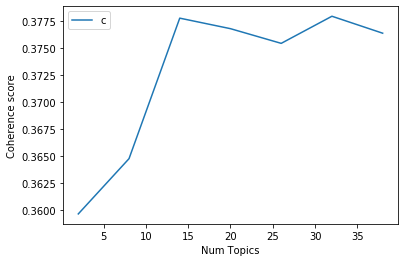

In [119]:
limit=40
start=2
step=6

model_list, coherence_values = compute_coherence_values(dictionary=dictionary, corpus=corpus, texts=list(final_df['3gram_reviews']), start=start, limit=limit, step=step)

# Show graph

x = range(start, limit, step)
plt.plot(x, coherence_values)
plt.xlabel("Num Topics")
plt.ylabel("Coherence score")
plt.legend(("coherence_values"), loc='best')
plt.show()

In [121]:
#build dictionary and corpus from 3gram dataset -- NO filter_extremes

documents = list(final_df['3gram_reviews'])
dictionary2 = gensim.corpora.Dictionary(documents)
corpus2 = [dictionary2.doc2bow(word) for word in documents]

In [122]:
# LDA model parameters.
num_topics = 15
passes = 100
eval_every = None #Evaluation will happen later so no need to evaluate while training

In [123]:
%time ldamodel2 = LdaMulticore(corpus2, num_topics=num_topics, id2word = dictionary2, passes=passes, alpha='asymmetric',eval_every=eval_every,workers=3)

# Check resulting topics.
topic_list = ldamodel2.print_topics(num_topics=num_topics, num_words=15)
for index, i in enumerate(topic_list):
    str1 = str(i[1])
    for c in "0123456789+*\".":
        str1 = str1.replace(c, "")
    str1 = str1.replace("  ", " ")
    print(str1)

Wall time: 1min 36s
best_total_war total_war time great fun lu_bu far good played play shogun yuan_shao cao_cao campaign got
total_war played game far play love good best fan three_kingdoms new great shogun ca time
good army cao_cao sun_jian fps empire come china han lu_bu sun_ce rice fast emperor betray
total_war battle character diplomacy campaign feel warhammer play unit faction general great series new shogun
crash ca patch fix issue update time amazing review bug play chinese hour work blood
total_war battle ai played look run feel general shogun army good little know fun ca
alot fun game gameplay hour tw play day good work need x general campaign battle
good great better new warhammer diplomacy feel total_war campaign bit ui tw nice think need
unit army general faction ai battle building turn enemy good thing need campaign diplomacy time
battle good play yes time need combat hero era history look thing know graphic love


In [124]:
# Compute Perplexity
print('\nPerplexity: ', ldamodel2.log_perplexity(corpus))  # a measure of how good the model is. lower the better.

# Compute Coherence Score
coherence_model_lda2 = CoherenceModel(model=ldamodel1, texts=documents, dictionary=dictionary, coherence='c_v')
coherence_lda2 = coherence_model_lda1.get_coherence()
print('\nCoherence Score: ', coherence_lda2)


Perplexity:  -8.090059680957241

Coherence Score:  0.37892300716172256


In [125]:
pyLDAvis.enable_notebook()
vis = p_gensim.prepare(ldamodel2, corpus2, dictionary2)
vis

C:\Users\Alfred\Anaconda3\lib\site-packages\pyLDAvis\_prepare.py:257: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  return pd.concat([default_term_info] + list(topic_dfs))


PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
0     -0.135647  0.064997       1        1  32.093063
1     -0.281759 -0.150059       2        1  18.140415
2     -0.133284  0.068986       3        1  15.594174
5     -0.031460  0.166388       4        1   7.195213
7     -0.074432  0.032001       5        1   5.979432
10     0.041909  0.035199       6        1   3.575654
3      0.016272  0.034616       7        1   3.094483
4      0.092551 -0.028504       8        1   2.402208
13     0.034367 -0.024783       9        1   2.193938
6      0.070199 -0.107399      10        1   1.982062
8      0.055628 -0.061541      11        1   1.800784
12     0.098873  0.015118      12        1   1.684235
14     0.013758  0.001658      13        1   1.610724
11     0.103631 -0.010993      14        1   1.396009
9      0.129394 -0.035682      15        1   1.257610, topic_info=     Category         Freq            Term        Total  loglift  logprob
189   Default   788.000000            good   788.000000  30.0000  30.0000
89    Default  1430.000000       total_war  1430.000000  29.0000  29.0000
156   Default   711.000000            unit   711.000000  28.0000  28.0000
227   Default   609.000000           great   609.000000  27.0000  27.0000
132   Default   588.000000       character   588.000000  26.0000  26.0000
291   Default   566.000000            time   566.000000  25.0000  25.0000
59    Default   631.000000            play   631.000000  24.0000  24.0000
296   Default   239.000000  best_total_war   239.000000  23.0000  23.0000
152   Default   425.000000          shogun   425.000000  22.0000  22.0000
29    Default   575.000000         faction   575.000000  21.0000  21.0000
1     Default   494.000000            army   494.000000  20.0000  20.0000
135   Default   437.000000             far   437.000000  19.0000  19.0000
462   Default   517.000000          played   517.000000  18.0000  18.0000
94    Default   273.000000            turn   273.000000  17.0000  17.0000
474   Default   352.000000            best   352.000000  16.0000  16.0000
251   Default   382.000000          series   382.000000  15.0000  15.0000
326   Default   159.000000            nice   159.000000  14.0000  14.0000
171   Default   632.000000         general   632.000000  13.0000  13.0000
129   Default   922.000000          battle   922.000000  12.0000  12.0000
0     Default   450.000000              ai   450.000000  11.0000  11.0000
558   Default   331.000000             fan   331.000000  10.0000  10.0000
117   Default   491.000000            game   491.000000   9.0000   9.0000
254   Default   309.000000              tw   309.000000   8.0000   8.0000
145   Default   432.000000            love   432.000000   7.0000   7.0000
215   Default   235.000000         amazing   235.000000   6.0000   6.0000
148   Default   303.000000            need   303.000000   5.0000   5.0000
26    Default   189.000000           enemy   189.000000   4.0000   4.0000
153   Default   451.000000  three_kingdoms   451.000000   3.0000   3.0000
101   Default   176.000000             war   176.000000   2.0000   2.0000
533   Default   381.000000           thing   381.000000   1.0000   1.0000
...       ...          ...             ...          ...      ...      ...
3489  Topic15     3.966563         penalty    12.238955   3.2492  -5.7918
4278  Topic15     2.067971        come_out     5.783272   3.3476  -6.4432
1433  Topic15     5.210683            beat    23.281445   2.8790  -5.5190
1203  Topic15    11.254021       yuan_shao    75.898140   2.4673  -4.7490
2770  Topic15     3.299482          waited    12.498099   3.0441  -5.9760
801   Topic15     5.981542             god    49.164646   2.2695  -5.3811
94    Topic15    12.178195            turn   273.704376   1.2636  -4.6701
8     Topic15     3.274399        breaking    18.022713   2.6705  -5.9836
1188  Topic15     5.152498         emperor    64.659958   1.8463  -5.5303
1155 

In [131]:
ldamodel1.save('noclean_1.lda')

C:\Users\Alfred\Anaconda3\lib\site-packages\smart_open\smart_open_lib.py:398: UserWarning: This function is deprecated, use smart_open.open instead. See the migration notes for details: https://github.com/RaRe-Technologies/smart_open/blob/master/README.rst#migrating-to-the-new-open-function
  'See the migration notes for details: %s' % _MIGRATION_NOTES_URL
C:\Users\Alfred\Anaconda3\lib\site-packages\smart_open\smart_open_lib.py:398: UserWarning: This function is deprecated, use smart_open.open instead. See the migration notes for details: https://github.com/RaRe-Technologies/smart_open/blob/master/README.rst#migrating-to-the-new-open-function
  'See the migration notes for details: %s' % _MIGRATION_NOTES_URL


In [132]:
ldamodel2.save('noclean_2.lda')

C:\Users\Alfred\Anaconda3\lib\site-packages\smart_open\smart_open_lib.py:398: UserWarning: This function is deprecated, use smart_open.open instead. See the migration notes for details: https://github.com/RaRe-Technologies/smart_open/blob/master/README.rst#migrating-to-the-new-open-function
  'See the migration notes for details: %s' % _MIGRATION_NOTES_URL
C:\Users\Alfred\Anaconda3\lib\site-packages\smart_open\smart_open_lib.py:398: UserWarning: This function is deprecated, use smart_open.open instead. See the migration notes for details: https://github.com/RaRe-Technologies/smart_open/blob/master/README.rst#migrating-to-the-new-open-function
  'See the migration notes for details: %s' % _MIGRATION_NOTES_URL


# First Run in Summary

In my first run I had 10 topics and I was able to identify 5 generally coherent topics from the 10 provided.

Unfortunately, I have LOST them completely in this first run. The saved models above do not include that one good model. I will try again after cleaning out infrequent terms from the corpus.


These were the topics:

1. **Series Authenticity**</br>
(Topic 1) Game's authenticity compared to other titles in the Total War series (Important because target market is full of hardcore history/ROTK buffs)

2. **Strategic Gameplay**</br>
(Topic 2) Gameplay on the strategic scale, inclusive of new features e.g. revamped Diplomacy, Romance/Records mode selection

3. **Tactical Gameplay**</br>
(Topic 3) Gameplay of individual battles and managing individual cities

4. **Historical/Cultural Authenticity**</br>
(Topic 4) Game's authenticity compared to source material. Based on Records and Romance of the Three Kingdoms, historical records and a novel respectively.

5. **Faction/Character Playstyle**</br>
(Topics 6 and 7) Each faction and character has special abilities. Liu Bei appears a lot because he is written as a virtuous hero in Romance of the Three Kingdoms. Also, his special passive ability is extremely powerful. (=50% upkeep cost for militia units, so theoretically can field 2x the number of armies as any other faction)


The other topics are not as coherent, and their term frequencies are quite low.

There are a few problems, and the following fixes are needed:

1. Make n-grams BEFORE lemmatisation and removal of numbers, to allow n-grams to include numbers. (Game names in the series can also then be identified)
2. Remove Chinese text; it appears in some of the other topics
3. Remove single-character text; it is unhelpful (e.g. i, u, x)
4. Remove low-frequency terms?
5. 

Decided not to use TF-IDF because "LDA is a probabilistic model that tries to estimate probability distributions for topics in documents and words in topics. The weighting of TF-IDF is not necessary for this."
Source: https://stackoverflow.com/a/44789327/6470915

In [231]:
# Running with slightly tweaked LDA model parameters.
num_topics = 10
passes = 100
eval_every = None #Evaluation will happen later so no need to evaluate while training

In [235]:
%time ldamodel2 = gensim.models.ldamodel.LdaModel(corpus, num_topics=num_topics, id2word = dictionary, passes=passes, alpha='auto',eta='auto',eval_every=eval_every)
#pickle.dump(ldamodel, open("PATH/model/lda.pickle", "wb"))
#pickle.dump(dictionary, open("PATH/model/dictionary.pickle", "wb"))
#pickle.dump(corpus, open("PATH/model/corpus.pickle", "wb"))

# Check resulting topics.
topic_list = ldamodel2.print_topics(num_topics=no_of_topics, num_words=15)
for index, i in enumerate(topic_list):
    str1 = str(i[1])
    for c in "0123456789+*\".":
        str1 = str1.replace(c, "")
    str1 = str1.replace("  ", " ")
    print(str1)

2019-07-14 16:35:24,621 : INFO : using autotuned alpha, starting with [0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1]
2019-07-14 16:35:24,625 : INFO : using serial LDA version on this node
2019-07-14 16:35:24,633 : INFO : running online (multi-pass) LDA training, 10 topics, 100 passes over the supplied corpus of 3654 documents, updating model once every 2000 documents, evaluating perplexity every 0 documents, iterating 50x with a convergence threshold of 0.001000
2019-07-14 16:35:24,635 : INFO : PROGRESS: pass 0, at document #2000/3654
2019-07-14 16:35:26,271 : INFO : optimized alpha [0.09169553, 0.09244968, 0.090950556, 0.0829254, 0.08269276, 0.08432789, 0.08963698, 0.09361565, 0.08775379, 0.090202816]
2019-07-14 16:35:26,275 : INFO : merging changes from 2000 documents into a model of 3654 documents
2019-07-14 16:35:26,278 : INFO : topic #4 (0.083): 0.018*"total_war" + 0.009*"best_total_war" + 0.008*"kingdoms" + 0.008*"shogun" + 0.006*"playing" + 0.006*"strategy" + 0.005*"unit" + 

Wall time: 2min 54s


2019-07-14 16:38:19,013 : INFO : topic #0 (0.155): 0.043*"best_total_war" + 0.031*"total_war" + 0.019*"far" + 0.017*"played" + 0.016*"best" + 0.012*"shogun" + 0.009*"date" + 0.008*"release" + 0.008*"battle" + 0.007*"hour" + 0.007*"run" + 0.007*"campaign" + 0.007*"year" + 0.006*"series" + 0.006*"strategy"
2019-07-14 16:38:19,014 : INFO : topic #1 (0.170): 0.019*"unit" + 0.017*"battle" + 0.016*"general" + 0.012*"faction" + 0.012*"ai" + 0.012*"army" + 0.009*"character" + 0.009*"campaign" + 0.008*"time" + 0.007*"diplomacy" + 0.005*"need" + 0.005*"enemy" + 0.005*"thing" + 0.005*"building" + 0.005*"duel"
2019-07-14 16:38:19,016 : INFO : topic #2 (0.281): 0.031*"total_war" + 0.018*"feel" + 0.017*"warhammer" + 0.012*"battle" + 0.009*"play" + 0.009*"campaign" + 0.009*"diplomacy" + 0.009*"series" + 0.009*"new" + 0.009*"kingdoms" + 0.008*"played" + 0.008*"character" + 0.008*"fan" + 0.008*"fun" + 0.008*"far"
2019-07-14 16:38:19,017 : INFO : topic #3 (0.031): 0.008*"hour" + 0.005*"sitting" + 0.005*

best_total_war total_war far played best shogun date release battle hour run campaign year series strategy
unit battle general faction ai army character campaign time diplomacy need enemy thing building duel
total_war feel warhammer battle play campaign diplomacy series new kingdoms played character fan fun far
hour sitting kingdoms worth_wait beautiful delay time_writing month long af listened hud cluttered deliver phenomenal
gongsun_zan pursue_lu_bu south liu_biao team china lubu wow unexpected ask better_previous rise midgame playing east
betray driver ive_played problem got bandit world cpu exam round broke improvement_previous hear let hardware
turn war army cao_cao liu_bei crash fix yuan_shao time vassal lu_bu playing problem faction got
total_war love best new amazing diplomacy fan series shogun kingdoms strategy historical dynasty_warrior title total_war_series
chinese kingdoms novel history china romance_kingdoms thank u know play people kingdom dynasty_warrior want player
pla

In [236]:
# Compute Perplexity
print('\nPerplexity: ', ldamodel2.log_perplexity(corpus))  # a measure of how good the model is. lower the better.

# Compute Coherence Score
coherence_model_lda2 = CoherenceModel(model=ldamodel2, texts=documents, dictionary=dictionary, coherence='c_v')
coherence_lda2 = coherence_model_lda2.get_coherence()
print('\nCoherence Score: ', coherence_lda2)

2019-07-14 16:38:21,985 : INFO : -8.007 per-word bound, 257.3 perplexity estimate based on a held-out corpus of 3654 documents with 98941 words



Perplexity:  -8.007301384266954


2019-07-14 16:38:21,991 : INFO : using ParallelWordOccurrenceAccumulator(processes=7, batch_size=64) to estimate probabilities from sliding windows
2019-07-14 16:38:28,139 : INFO : 7 accumulators retrieved from output queue
2019-07-14 16:38:28,230 : INFO : accumulated word occurrence stats for 19966 virtual documents



Coherence Score:  0.4523954677172358


In [237]:
pyLDAvis.enable_notebook()
vis = pyLDAvis.gensim.prepare(ldamodel2, corpus, dictionary)
vis

C:\Users\Alfred\Anaconda3\lib\site-packages\pyLDAvis\_prepare.py:257: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  return pd.concat([default_term_info] + list(topic_dfs))


PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
1     -0.126236 -0.181679       1        1  31.608032
2     -0.255868 -0.009157       2        1  27.727076
6      0.057926 -0.247468       3        1  10.178950
7     -0.169095  0.103952       4        1  10.116252
0     -0.122078  0.105887       5        1   8.118382
9     -0.038054  0.072423       6        1   4.997414
8      0.094960  0.069886       7        1   4.068222
5      0.197991  0.014763       8        1   1.277821
3      0.176570  0.050517       9        1   1.244069
4      0.183883  0.020875      10        1   0.663784, topic_info=     Category         Freq             Term        Total  loglift  logprob
91    Default  1749.000000        total_war  1749.000000  30.0000  30.0000
291   Default   399.000000   best_total_war   399.000000  29.0000  29.0000
147   Default   464.000000             love   464.000000  28.0000  28.0000
255   Default   519.000000             best   519.000000  27.0000  27.0000
60    Default   655.000000             play   655.000000  26.0000  26.0000
339   Default   425.000000              fun   425.000000  25.0000  25.0000
156   Default   677.000000             unit   677.000000  24.0000  24.0000
451   Default   475.000000           played   475.000000  23.0000  23.0000
134   Default   441.000000              far   441.000000  22.0000  22.0000
115   Default   597.000000             feel   597.000000  21.0000  21.0000
120   Default   490.000000              new   490.000000  20.0000  20.0000
144   Default   468.000000         kingdoms   468.000000  19.0000  19.0000
95    Default   339.000000             turn   339.000000  18.0000  18.0000
2     Default   488.000000             army   488.000000  17.0000  17.0000
153   Default   405.000000           shogun   405.000000  16.0000  16.0000
142   Default   262.000000             hour   262.000000  15.0000  15.0000
125   Default   579.000000        warhammer   579.000000  14.0000  14.0000
543   Default   326.000000              fan   326.000000  13.0000  13.0000
282   Default   409.000000           series   409.000000  12.0000  12.0000
215   Default   245.000000          amazing   245.000000  11.0000  11.0000
384   Default   145.000000          chinese   145.000000  10.0000  10.0000
172   Default   635.000000          general   635.000000   9.0000   9.0000
571   Default   161.000000          history   161.000000   8.0000   8.0000
522   Default   184.000000            china   184.000000   7.0000   7.0000
128   Default   968.000000           battle   968.000000   6.0000   6.0000
61    Default   332.000000          playing   332.000000   5.0000   5.0000
25    Default   628.000000        diplomacy   628.000000   4.0000   4.0000
102   Default   178.000000              war   178.000000   3.0000   3.0000
757   Default   192.000000          release   192.000000   2.0000   2.0000
0     Default   495.000000               ai   495.000000   1.0000   1.0000
...       ...          ...              ...          ...      ...      ...
5313  Topic10     1.228569          acquire     1.933168   4.5617  -6.2815
5091  Topic10     1.140787           burned     1.844565   4.5344  -6.3556
1479  Topic10     1.138678           profit     1.842584   4.5337  -6.3574
2357  Topic10     1.026592            panda     1.730375   4.4929  -6.4611
8431  Topic10     0.925354           skynet     1.629117   4.4494  -6.5649
7544  Topic10     0.924506      snowballing     1.628314   4.4489  -6.5658
7678  Topic10     0.922371              etw     1.626391   4.4478  -6.5681
7077  Topic10     0.919569          qualify     1.623489   4.4465  -6.5712
2293  Topic10     4.511174     pursue_lu_bu     8.866163   4.3393  -4.9808
4345  Topic10     1.982464          samurai     3.838204   4.3543  -5.8030
349   Topic10     3.840771            south    15.720738   3.6057  -5.1416
702   Topic10     2.405912             rise    10.732201   3.5196  -5.6094
2925  Top

In [ ]:
%time

### Another attempt using filtered dictionary to remove high and low frequency terms

In [ ]:
#build dictionary and corpus from 3gram dataset -- NO filter_extremes

dictionary2 = gensim.corpora.Dictionary(documents)
dictionary2.filter_extremes(no_below = 5)
corpus2 = [dictionary2.doc2bow(word) for word in documents]

### References

https://datascienceplus.com/evaluation-of-topic-modeling-topic-coherence/